In [1]:
# import relevant libraries
import requests
import pandas as pd
import numpy as np
import math
import json

In [2]:
# set API request parameters
api_server = 'https://platform-api.opentargets.io/v3/platform/'
api_endpoint = 'public/evidence/filter'
size = '10000'
drug_evidence_parameters = 'datasource=chembl&fields=disease.efo_info&fields=drug&fields=evidence&fields=target&fields=access_level'
disease_efo_id = 'EFO_0000270'
disease_label = 'asthma'

In [3]:
# construct API request URL using parameters
api_request_url = (api_server + 
       api_endpoint + 
       '?size=' + size +
       '&' + drug_evidence_parameters +
       '&disease=' + disease_efo_id 
) 

In [4]:
# use requests library to call Open Targets API and transform response in JSON
api_response = requests.get(api_request_url).json()
all_drugs_data = api_response['data']
print(len(all_drugs_data))

2842


In [5]:
trials_data = [item['evidence']['drug2clinic'] for item in all_drugs_data]

In [6]:
from pandas.io.json import json_normalize
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100
drugs_data_df = pd.DataFrame.from_dict(json_normalize(all_drugs_data), orient='columns')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [7]:
drugs_data_df.head(2)

,access_level,target.target_name,target.gene_info.symbol,target.gene_info.name,target.gene_info.geneid,target.target_type,target.activity,target.target_class,target.id,disease.efo_info.therapeutic_area.labels,disease.efo_info.therapeutic_area.codes,disease.efo_info.path,disease.efo_info.efo_id,disease.efo_info.label,drug.molecule_name,drug.id,drug.molecule_type,evidence.target2drug.action_type,evidence.target2drug.mechanism_of_action,evidence.target2drug.urls,evidence.target2drug.provenance_type.expert.status,evidence.target2drug.provenance_type.database.version,evidence.target2drug.provenance_type.database.id,evidence.target2drug.is_associated,evidence.target2drug.resource_score.type,evidence.target2drug.resource_score.value,evidence.target2drug.evidence_codes,evidence.target2drug.date_asserted,evidence.drug2clinic.status,evidence.drug2clinic.clinical_trial_phase.numeric_index,evidence.drug2clinic.clinical_trial_phase.label,evidence.drug2clinic.urls,evidence.drug2clinic.provenance_type.expert.status,evidence.drug2clinic.is_associated,evidence.drug2clinic.resource_score.type,evidence.drug2clinic.resource_score.value,evidence.drug2clinic.evidence_codes,evidence.drug2clinic.date_asserted,evidence.evidence_codes_info,evidence.evidence_codes,evidence.target2drug.provenance_type.literature.references,target.complex_id,target.binding_subunit_known
0,public,Beta-2 adrenergic receptor,ADRB2,adrenoceptor beta 2,ENSG00000169252,single_protein,positive_modulator,[Adrenergic receptor],ENSG00000169252,[respiratory or thoracic disease],[OTAR_0000010],"[[OTAR_0000010, MONDO_0000651, EFO_1002018, EFO_0000270], [OTAR_0000010, EFO_0000684, EFO_000943...",http://www.ebi.ac.uk/efo/EFO_0000270,asthma,ALBUTEROL,http://identifiers.org/chembl.compound/CHEMBL714,Small molecule,AGONIST,Beta-2 adrenergic receptor agonist,"[{'url': 'https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL714', 'nice_name': 'ChEMBL molecul...",True,27,ChEMBL,True,probability,1,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/target_drug, http://purl...",2015-01-14T00:00:00.000Z,Completed,4,Phase IV,"[{'url': 'https://clinicaltrials.gov/search?id=%22NCT00393367%22', 'nice_name': 'Clinical Trials...",True,True,probability,1.0,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/drug_disease]",2012-08-06T00:00:00.000Z,"[[{'eco_id': 'target_drug', 'label': 'biological target to drug evidence'}], [{'eco_id': 'ECO_00...","[target_drug, ECO_0000205, drug_disease]",NaN,NaN,NaN
1,public,Glucocorticoid receptor,NR3C1,nuclear receptor subfamily 3 group C member 1,ENSG00000113580,single_protein,positive_modulator,[Nuclear hormone receptor subfamily 3 group C member 1],ENSG00000113580,[respiratory or thoracic disease],[OTAR_0000010],"[[OTAR_0000010, MONDO_0000651, EFO_1002018, EFO_0000270], [OTAR_0000010, EFO_0000684, EFO_000943...",http://www.ebi.ac.uk/efo/EFO_0000270,asthma,BUDESONIDE,http://identifiers.org/chembl.compound/CHEMBL1370,Small molecule,AGONIST,Glucocorticoid receptor agonist,"[{'url': 'https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL1370', 'nice_name': 'ChEMBL molecu...",True,27,ChEMBL,True,probability,1,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/target_drug, http://purl...",2015-01-14T00:00:00.000Z,NaN,4,Phase IV,[{'url': 'https://api.fda.gov/drug/label.json?search=set_id:d70092e2-07e2-4a23-aa6a-0e2444e12ee2...,True,True,probability,1.0,"[http://purl.obolibrary.org/obo/ECO_0000205, http://identifiers.org/eco/drug_disease]",2013-04-09T00:00:00.000Z,"[[{'eco_id': 'target_drug', 'label': 'biological target to drug evidence'}], [{'eco_id': 'ECO_00...","[target_drug, ECO_0000205, drug_disease]","[{'lit_id': 'http://europepmc.org/abstract/MED/11730731'}, {'lit_id': 'http://europepmc.org/abst...",NaN,NaN


Text(0,0.5,'Count')

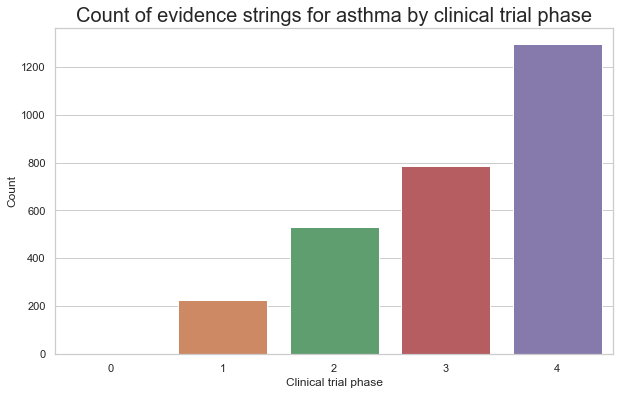

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='evidence.drug2clinic.clinical_trial_phase.numeric_index', data=drugs_data_df)
plt.title('Count of evidence strings for ' + disease_label + ' by clinical trial phase', fontsize=20)
plt.xlabel('Clinical trial phase', fontsize=12)
plt.ylabel('Count', fontsize=12)


In [10]:
duplicate_columns = ['disease.efo_info.label',
                     'drug.molecule_name']
duplicates_df = drugs_data_df.pivot_table(values=duplicate_columns,
                                          index='evidence.drug2clinic.clinical_trial_phase.numeric_index',
                                          columns='evidence.drug2clinic.status',
                                          fill_value=0,
                                          aggfunc='size')

In [11]:
duplicates_df

evidence.drug2clinic.status,"Active, not recruiting",Completed,Enrolling by invitation,Not yet recruiting,Recruiting,Suspended,Terminated,Unknown status,Withdrawn
evidence.drug2clinic.clinical_trial_phase.numeric_index,,,,,,,,,
0,0,5,0,0,0,0,0,0,0
1,1,179,1,3,6,0,28,0,8
2,2,447,0,5,12,0,24,17,23
3,8,671,4,18,28,1,20,2,33
4,2,407,2,9,23,1,48,36,13


In [12]:
# next steps

# run aggregation for diabetes mellitus
# make count plot 
# make count plot broken down by phases
# focus on phase IV - make count plot broken down by phase with unaggregated data
# focus on phase IV - make count plot broken down by phase with aggregated data

In [13]:
cols_to_group = [
    'disease.efo_info.label',
    'drug.molecule_name',
    'evidence.drug2clinic.clinical_trial_phase.numeric_index',
    'evidence.drug2clinic.status'
]

drugs_data_df_no_dups = drugs_data_df.groupby(cols_to_group).size().reset_index(name='count')

In [14]:
drugs_data_df_no_dups.head(2)

,disease.efo_info.label,drug.molecule_name,evidence.drug2clinic.clinical_trial_phase.numeric_index,evidence.drug2clinic.status,count
0,Status Asthmaticus,ALBUTEROL,1,Completed,1
1,Status Asthmaticus,ALBUTEROL,2,Terminated,1


Text(0,0.5,'Count')

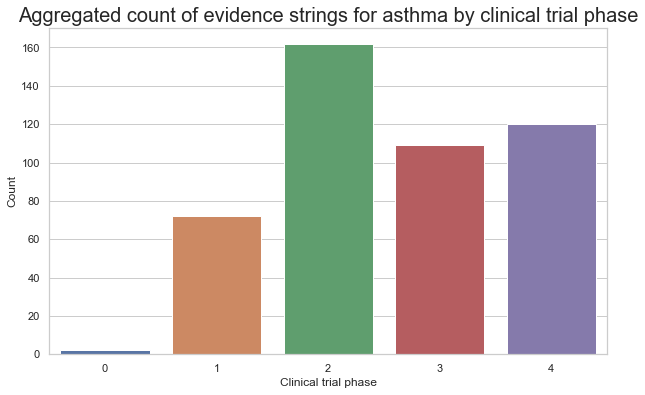

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))

ax = sns.countplot(x='evidence.drug2clinic.clinical_trial_phase.numeric_index', data=drugs_data_df_no_dups)
plt.title('Aggregated count of evidence strings for ' + disease_label + ' by clinical trial phase', fontsize=20)
plt.xlabel('Clinical trial phase', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [18]:
new_df = drugs_data_df['evidence.drug2clinic.clinical_trial_phase.numeric_index'].value_counts().rename_axis('trial_phase').reset_index(name='counts_not_aggregated')

In [19]:
new_df.head()

,trial_phase,counts_not_aggregated
0,4,1296
1,3,785
2,2,530
3,1,226
4,0,5


In [20]:
new_df_2 = drugs_data_df_no_dups['evidence.drug2clinic.clinical_trial_phase.numeric_index'].value_counts().rename_axis('trial_phase').reset_index(name='counts_aggregated')

In [21]:
new_df_2.head()

,trial_phase,counts_aggregated
0,2,162
1,4,120
2,3,109
3,1,72
4,0,2


In [22]:
test_df = pd.merge(new_df, new_df_2, on='trial_phase', how='outer')

In [23]:
test_df.head()

,trial_phase,counts_not_aggregated,counts_aggregated
0,4,1296,120
1,3,785,109
2,2,530,162
3,1,226,72
4,0,5,2


In [24]:
melt_df = pd.melt(test_df, id_vars='trial_phase', value_vars=['counts_not_aggregated', 'counts_aggregated'])

In [25]:
melt_df

,trial_phase,variable,value
0,4,counts_not_aggregated,1296
1,3,counts_not_aggregated,785
2,2,counts_not_aggregated,530
3,1,counts_not_aggregated,226
4,0,counts_not_aggregated,5
5,4,counts_aggregated,120
6,3,counts_aggregated,109
7,2,counts_aggregated,162
8,1,counts_aggregated,72
9,0,counts_aggregated,2


Text(0,0.5,'Count')

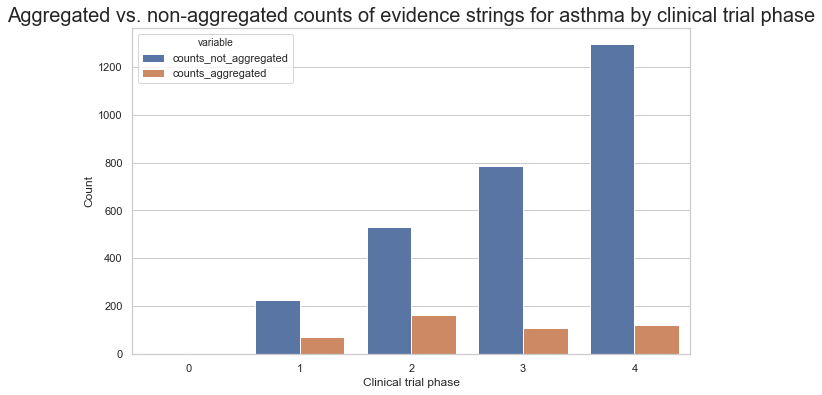

In [43]:


sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=melt_df, x='trial_phase', y='value', hue='variable')
plt.title('Aggregated vs. non-aggregated counts of evidence strings for ' + disease_label + ' by clinical trial phase', fontsize=20)
plt.xlabel('Clinical trial phase', fontsize=12)
plt.ylabel('Count', fontsize=12)







In [27]:
## explore phase 2 data

In [40]:
drugs_data_df_phase_2 = drugs_data_df.loc[drugs_data_df['evidence.drug2clinic.clinical_trial_phase.numeric_index'] == 2]

In [41]:
print(len(drugs_data_df_phase_2))

530


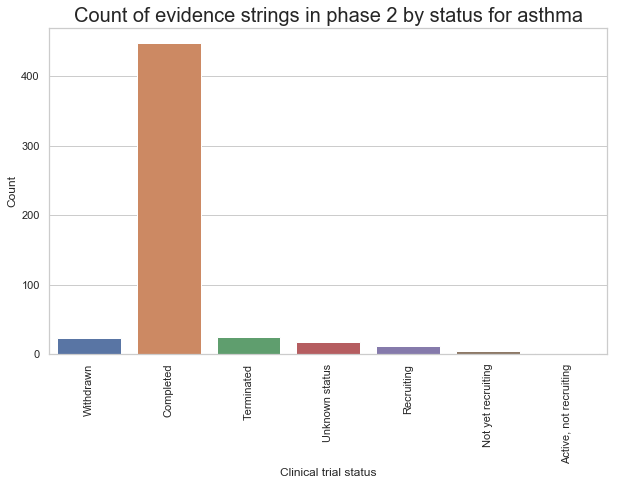

In [44]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='evidence.drug2clinic.status',
                   data=drugs_data_df_phase_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Count of evidence strings in phase 2 by status for ' + disease_label, fontsize=20)
plt.xlabel('Clinical trial status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



In [46]:
new_ph2_df = drugs_data_df_phase_2['evidence.drug2clinic.status'].value_counts().rename_axis('trial_status').reset_index(name='counts_not_aggregated')
new_ph2_df

,trial_status,counts_not_aggregated
0,Completed,447
1,Terminated,24
2,Withdrawn,23
3,Unknown status,17
4,Recruiting,12
5,Not yet recruiting,5
6,"Active, not recruiting",2


In [47]:
cols_to_group = [
    'disease.efo_info.label',
    'drug.molecule_name',
    'evidence.drug2clinic.clinical_trial_phase.numeric_index',
    'evidence.drug2clinic.status'
]

drugs_data_df_ph2_no_dups = drugs_data_df_phase_2.groupby(cols_to_group).size().reset_index(name='count')

In [48]:
new_ph2_df_2 = drugs_data_df_ph2_no_dups['evidence.drug2clinic.status'].value_counts().rename_axis('trial_status').reset_index(name='counts_aggregated')
new_ph2_df_2

,trial_status,counts_aggregated
0,Completed,97
1,Terminated,18
2,Withdrawn,18
3,Unknown status,12
4,Recruiting,10
5,Not yet recruiting,5
6,"Active, not recruiting",2


In [65]:
test_df_2 = pd.merge(new_ph2_df, new_ph2_df_2, on='trial_status', how='outer')
test_df_3 = test_df_2.rename(columns={'trial_status':'phase_2_trial_status'})
test_df_3

,phase_2_trial_status,counts_not_aggregated,counts_aggregated
0,Completed,447,97
1,Terminated,24,18
2,Withdrawn,23,18
3,Unknown status,17,12
4,Recruiting,12,10
5,Not yet recruiting,5,5
6,"Active, not recruiting",2,2


In [50]:
melt_df_2 = pd.melt(test_df_2, id_vars='trial_status', value_vars=['counts_not_aggregated', 'counts_aggregated'])

In [51]:
melt_df_2.head(10)

,trial_status,variable,value
0,Completed,counts_not_aggregated,447
1,Terminated,counts_not_aggregated,24
2,Withdrawn,counts_not_aggregated,23
3,Unknown status,counts_not_aggregated,17
4,Recruiting,counts_not_aggregated,12
5,Not yet recruiting,counts_not_aggregated,5
6,"Active, not recruiting",counts_not_aggregated,2
7,Completed,counts_aggregated,97
8,Terminated,counts_aggregated,18
9,Withdrawn,counts_aggregated,18


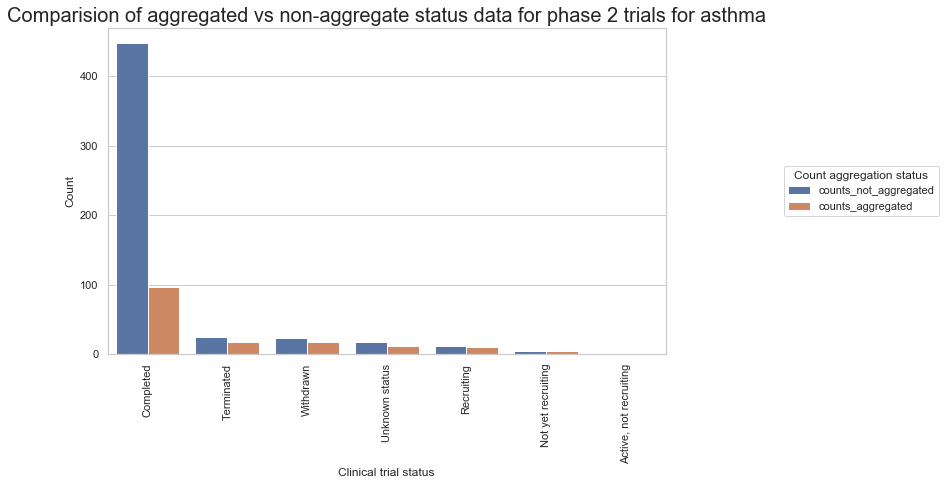

In [53]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(10, 6))

ax = sns.barplot(data=melt_df_2, x='trial_status', y='value', hue='variable')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(loc='center right', bbox_to_anchor=(1.50, 0.5), ncol=1)
leg = ax.get_legend()
leg.set_title("Count aggregation status")

plt.title('Comparision of aggregated vs non-aggregate status data for phase 2 trials for ' + disease_label, fontsize=20)
plt.xlabel('Clinical trial status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()